# **TensorFlow WebDesign em Foco**

## *Importação*

In [1]:
# Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model
from IPython.display import Image
%matplotlib inline

### *Criando uma Sessão*

In [2]:
# Sessão
with tf.compat.v1.Session() as sess:
    frase = tf.constant("Olá Mundo!")
    rodar = sess.run(frase)
print(rodar)

b'Ol\xc3\xa1 Mundo!'


In [3]:
# Outra forma
tf.compat.v1.disable_eager_execution()
frase = tf.constant("Hello World")
sess = tf.compat.v1.Session()
rodar = sess.run(frase)
sess.close()
print(rodar)

b'Hello World'


### *Grafo Computacional*

In [4]:
# Visualizando o grafo
tf.compat.v1.disable_eager_execution()
num1 = tf.constant(5)
num2 = tf.constant(2)

with tf.compat.v1.Session() as sess:
    soma = tf.math.add(num1, num2)
    write = tf.compat.v1.summary.FileWriter('C:/Labs/TensorFlow/plot', sess.graph)
    saida = sess.run(soma)

### *Keras - Classificação de Imagens*

#### Dados

In [5]:
# mportando o Data Frame de imagens
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
# As classes de roupas
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

### *Normalização dos Dados de Imagens*

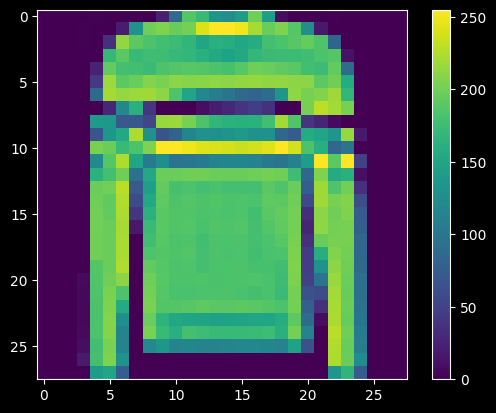

In [7]:
# Normalizando e visualizando
plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

X_train = X_train / 255.0
X_test = X_test / 255.0

### *Criando o modelo*

In [8]:
# Modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
# Compilando o modelo
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Treinando o modelo
model.fit(X_train, y_train, epochs=30)
model.save('final_model.h5')

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4981 - accuracy: 0.8237
Epoch 2/30
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3745 - accuracy: 0.8655
Epoch 3/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3354 - accuracy: 0.8780
Epoch 4/30
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3129 - accuracy: 0.8859
Epoch 5/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2946 - accuracy: 0.8919
Epoch 6/30
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2786 - accuracy: 0.8971
Epoch 7/30
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2687 - accuracy: 0.8996
Epoch 8/30
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2581 - accuracy: 0.9046
Epoch 9/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2476 - accuracy: 0.9081
Epoch 10/30
6

c:\Labs\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### *Predições*

In [11]:
# Predição
pred = model.predict(X_test)
pred[19]

c:\Labs\venv\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([9.82446790e-01, 3.04634220e-08, 2.24184524e-03, 3.50456045e-04,
       8.31058787e-06, 5.77275925e-14, 1.49524845e-02, 3.43943172e-19,
       1.33033240e-09, 1.23872470e-13], dtype=float32)

In [12]:
# Valor máximo
np.argmax(pred[19])

0

In [13]:
# Visualizando o y de Teste
y_test[19]

0

### *Predizendo Novas Imagem*

In [14]:
# Função de carregamento de Imagem
def load_image(filename):
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28)
    img = img.astype('float32')
    img = img / 255.0
    return img

c:\Labs\venv\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


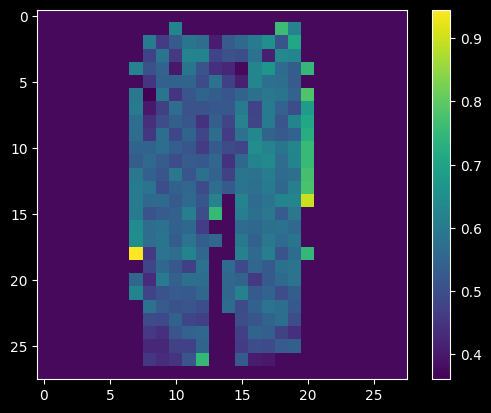

In [15]:
# Testando com imagem
# Testando com imagem
newImg = load_image('./img/calca_moleton.png')
newImg2 = newImg.reshape(28, 28)
plt.figure()
plt.imshow(newImg2, cmap='viridis')  # Usando newImg2 aqui
plt.colorbar()
plt.grid(False)

In [16]:
# predizendo 
pred = model.predict(newImg)
np.argmax(pred)

8

In [17]:
# nome da classe
class_names[8]

'Bag'